In [1]:
import pandas as pd
import requests
import json
from pprint import pprint
from api_key import omdb_key


import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
from collections import Counter
from collections import defaultdict

word_counts = {}
with open('merged_movie_data.csv', 'r') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
       csv_words = row[1].split(", ")
       for word in csv_words:
           if word in word_counts:
               word_counts[word] += 1;
           else:
               word_counts[word] = 1;

word_counts
#this is for all of the movies

{'Drama': 413,
 'Adventure': 49,
 'Biography': 89,
 'Thriller': 57,
 'Comedy': 100,
 'Musical': 36,
 'Romance': 203,
 'Crime': 54,
 'Sci-Fi': 4,
 'War': 56,
 'History': 65,
 'Fantasy': 25,
 'Mystery': 35,
 'Music': 21,
 'Action': 24,
 'Family': 25,
 'Western': 17,
 'Animation': 4,
 'Sport': 17,
 'Film-Noir': 10,
 'Horror': 3}

In [3]:
 # Create an array that contains the number of users each language has
genre = ['Drama', 'Adventure', 'Biography', 'Thriller', 'Comedy', 'Musical', 
         'Romance', 'Crime', 'Sci-Fi', 'War', 'History', 'Fantasy', 'Mystery', 
         'Music', 'Action', 'Family', 'Western', 'Animation', 'Sport', 'Film-Noir', 'Horror']
count = [413, 49, 89, 57, 100, 36, 203, 54, 4, 56, 65, 25, 35, 21, 24, 25, 17, 4, 17, 10, 3]

Text(0, 0.5, 'Count of Genre of Nominees')

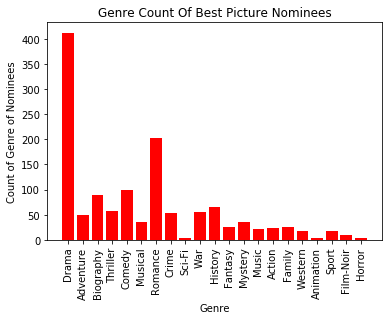

In [4]:
plt.bar(genre, count, color='r', alpha=1.0, align="center")
plt.xticks(rotation=90)

plt.title("Genre Count Of Best Picture Nominees")
plt.xlabel("Genre")
plt.ylabel("Count of Genre of Nominees")

In [5]:
# create a path to csv and read it into a pandas dataframe
movies_csv = 'merged_movie_data.csv'
movies_df = pd.read_csv(movies_csv, usecols = ['Title', 'Genre', 'Meta_Score', 'imdb_Rating', 
                                               'Box_Office', 'Rated', 'Studio', 'Release_Date', 
                                               'Poster_URL', 'Plot', 'Year', 'Category', 'Nominee', 
                                               'Won?'], encoding = 'latin-1')

# create another dataframe that only includes winners of the Best Picture category
movies_data = movies_df.loc[movies_df['Won?'] == 'YES', :]

# create list of best picture nominees
best_picture_wins = movies_data["Won?"]

movies_data.head()

,Title,Genre,Meta_Score,imdb_Rating,Box_Office,Rated,Studio,Release_Date,Poster_URL,Plot,Year,Category,Nominee,Won?
3,A Beautiful Mind,"Biography, Drama",72.0,8.2,NaN,PG-13,Universal Pictures,4-Jan-02,https://m.media-amazon.com/images/M/MV5BMzcwYW...,"After John Nash, a brilliant but asocial mathe...",2001 (74th),Best Picture,A Beautiful Mind,YES
8,A Man for All Seasons,"Biography, Drama, History",NaN,7.8,NaN,G,Sony Pictures Home Entertainment,3-May-67,https://m.media-amazon.com/images/M/MV5BMTRjOT...,"The story of Sir Thomas More, who stood up to ...",1966 (39th),Best Picture,A Man for All Seasons,YES
24,All Quiet on the Western Front,"Drama, War",NaN,8.1,NaN,Not Rated,Universal Pictures,24-Aug-30,https://m.media-amazon.com/images/M/MV5BMzg2MW...,A young soldier faces profound disillusionment...,1929/30 (3rd),Best Picture,All Quiet on the Western Front,YES
26,All the King's Men,"Drama, Thriller",37.0,6.2,NaN,PG-13,NaN,22-Sep-06,https://m.media-amazon.com/images/M/MV5BMzY1MT...,Based on the Robert Penn Warren novel. The lif...,1949 (22nd),Best Picture,All the King's Men,YES
29,Amadeus,"Biography, Drama, History, Music",88.0,8.3,NaN,R,Warner Bros. Pictures,19-Sep-84,https://m.media-amazon.com/images/M/MV5BNWJlNz...,"The life, success and troubles of Wolfgang Ama...",1984 (57th),Best Picture,Amadeus,YES


In [6]:
# coverting dataframe into csv
movies_data.to_csv('best_picture_winners.csv', index=False)

In [7]:
winner_word_counts = {}
with open('best_picture_winners.csv', 'r') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
       csv_words = row[1].split(", ")
       for word in csv_words:
           if word in winner_word_counts:
               winner_word_counts[word] += 1;
           else:
               winner_word_counts[word] = 1;

winner_word_counts

{'Biography': 17,
 'Drama': 72,
 'History': 14,
 'War': 15,
 'Thriller': 10,
 'Music': 2,
 'Musical': 9,
 'Romance': 29,
 'Comedy': 12,
 'Action': 3,
 'Adventure': 9,
 'Family': 6,
 'Western': 3,
 'Sport': 3,
 'Crime': 11,
 'Mystery': 2,
 'Fantasy': 1,
 'Film-Noir': 1}

In [9]:
genre_winners = ['Drama', 'Adventure', 'Biography', 'Thriller', 'Comedy', 'Musical', 
                 'Romance', 'Crime', 'Sci-Fi', 'War', 'History', 'Fantasy', 'Mystery', 
                 'Music', 'Action', 'Family', 'Western', 'Animation', 'Sport', 'Film-Noir', 'Horror']
count_winners = [72, 9, 17, 10, 12, 9, 29, 11, 0, 15, 14, 1, 2, 2, 3, 6, 3, 0, 3, 1, 0]

Text(0, 0.5, 'Count of Genre of Winning Movies')

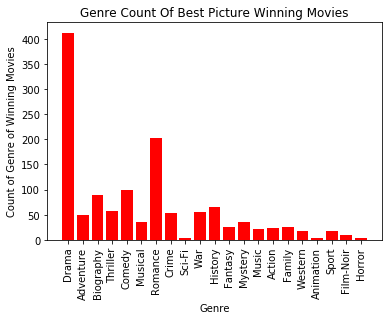

In [10]:
plt.bar(genre, count, color='r', alpha=1.0, align="center")
plt.xticks(rotation=90)

plt.title("Genre Count Of Best Picture Winning Movies")
plt.xlabel("Genre")
plt.ylabel("Count of Genre of Winning Movies")

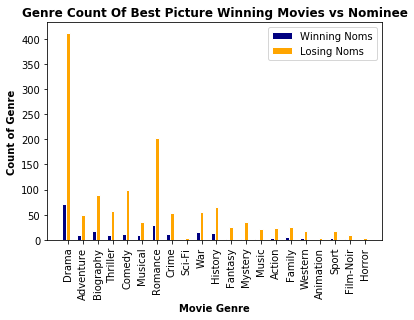

In [12]:
# set width of bar
barWidth = 0.25
 
# set height of bar
nominee_genre_count = [413, 49, 89, 57, 100, 36, 203, 54, 4, 56, 65, 25, 35, 21, 24, 25, 17, 4, 17, 10, 3]
winner_genre_count = [72, 9, 17, 10, 12, 9, 29, 11, 0, 15, 14, 1, 2, 2, 3, 6, 3, 0, 3, 1, 0]

 
# Set position of bar on X axis
r1 = np.arange(len(nominee_genre_count))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, winner_genre_count, color='navy', width=barWidth, edgecolor='white', label='Winning Noms')
plt.bar(r2, nominee_genre_count, color='orange', width=barWidth, edgecolor='white', label='Losing Noms')

 
# Add xticks on the middle of the group bars
plt.title("Genre Count Of Best Picture Winning Movies vs Nominee", fontweight='bold')
plt.xlabel('Movie Genre', fontweight='bold')
plt.ylabel("Count of Genre", fontweight='bold')

plt.xticks([r + barWidth for r in range(len(nominee_genre_count))], ['Drama', 'Adventure', 'Biography', 
                                                                     'Thriller', 'Comedy', 'Musical', 'Romance', 
                                                                     'Crime', 'Sci-Fi', 'War', 'History', 'Fantasy', 
                                                                     'Mystery', 'Music', 'Action', 'Family', 'Western', 
                                                                     'Animation', 'Sport', 'Film-Noir', 'Horror'], 
           rotation=90)


#create legend, show graphic
plt.legend()
plt.show()